In [17]:
! pip install pydot


[notice] A new release of pip available: 22.3 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### CNN Model  
>This cell compiles the CNN model and trains it on the preprocessed MNIST dataset. It displays the model summary, tracks training progress through performance metrics, and outputs the test accuracy as a percentage.



In [18]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import cv2
import os
graphviz = r"D:\SHU\ML_lab\Assesment\ml_ocr\Scripts\Graphviz"

# Load MNIST dataset
def load_mnist():
    (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
    x_train = x_train.astype("float32") / 255.0
    x_test = x_test.astype("float32") / 255.0
    x_train = x_train.reshape(-1, 28, 28, 1)
    x_test = x_test.reshape(-1, 28, 28, 1)

    # One-hot encode the labels
    y_train = keras.utils.to_categorical(y_train, num_classes=10)
    y_test = keras.utils.to_categorical(y_test, num_classes=10)

    return x_train, y_train, x_test, y_test


# Define CNN model with improved architecture
def create_model():
    cnn_model = keras.Sequential(
        [
            keras.layers.Conv2D(
                64, (3, 3), activation="relu", padding="same", input_shape=(28, 28, 1)
            ),
            keras.layers.BatchNormalization(),
            keras.layers.MaxPooling2D((2, 2)),
            keras.layers.Dropout(0.3),
            keras.layers.Conv2D(128, (3, 3), activation="relu", padding="same"),
            keras.layers.BatchNormalization(),
            keras.layers.MaxPooling2D((2, 2)),
            keras.layers.Dropout(0.3),
            keras.layers.Conv2D(256, (3, 3), activation="relu", padding="same"),
            keras.layers.BatchNormalization(),
            keras.layers.MaxPooling2D((2, 2)),
            keras.layers.Dropout(0.4),
            keras.layers.Flatten(),
            keras.layers.Dense(256, activation="relu"),
            keras.layers.BatchNormalization(),
            keras.layers.Dropout(0.5),
            keras.layers.Dense(10, activation="softmax"),  # Output layer for 10 classes
        ]
    )
    cnn_model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss="categorical_crossentropy",
        metrics=["accuracy"],
    )

    # Plot the model architecture and save it as an image
    keras.utils.plot_model(
        cnn_model, 
        show_shapes=True,  # Display the shapes of the layers
        show_layer_names=True  # Display the layer names
    )

    # Display the model summary
    cnn_model.name = "Improved_Numbers_Recognition_CNN_Model"
    cnn_model.summary()

    return cnn_model


# Train and save model
(x_train, y_train, x_test, y_test) = load_mnist()
cnn_model = create_model()
history = cnn_model.fit(
    x_train, y_train, epochs=8, batch_size=64, validation_data=(x_test, y_test)
)
cnn_model.save("mnist_cnn_model_improved.h5")  # Save cnn_model for later use
test_loss, test_acc = cnn_model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")
#     return history, model


# history, model = train_and_save_model()




You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


d:\SHU\ML_lab\Assesment\ml_ocr\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "Improved_Numbers_Recognition_CNN_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 7, 7, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 965,130 (3.68 MB)

 Trainable params: 963,722 (3.68 MB)

 Non-trainable params: 1,408 (5.50 KB)

Epoch 1/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 85s 87ms/step - accuracy: 0.8624 - loss: 0.4611 - val_accuracy: 0.9868 - val_loss: 0.0388
Epoch 2/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 86ms/step - accuracy: 0.9765 - loss: 0.0748 - val_accuracy: 0.9899 - val_loss: 0.0297
Epoch 3/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 85ms/step - accuracy: 0.9831 - loss: 0.0531 - val_accuracy: 0.9901 - val_loss: 0.0267
Epoch 4/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 85s 91ms/step - accuracy: 0.9845 - loss: 0.0492 - val_accuracy: 0.9928 - val_loss: 0.0212
Epoch 5/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 125s 133ms/step - accuracy: 0.9868 - loss: 0.0423 - val_accuracy: 0.9925 - val_loss: 0.0212
Epoch 6/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 128s 137ms/step - accuracy: 0.9889 - loss: 0.0361 - val_accuracy: 0.9938 - val_loss: 0.0188
Epoch 7/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 132s 141ms/step - accuracy: 0.9866 - loss: 0.0427 - val_accuracy: 0.9926 - val_loss: 0.0236
Epoch 8/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 133s 141ms/step - accuracy: 0.9900 - loss: 0.0335 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.9904 - loss: 0.0309
Test Accuracy: 99.25%


### CNN: Visualize Training Accuracy & Confusion Matrix
> This cell plots the training and validation loss/accuracy curves, providing insights into the model's learning process over the training epochs.
> Also, it creates a confusion matrix to visually assess the classification performance and identify any areas of misclassification.



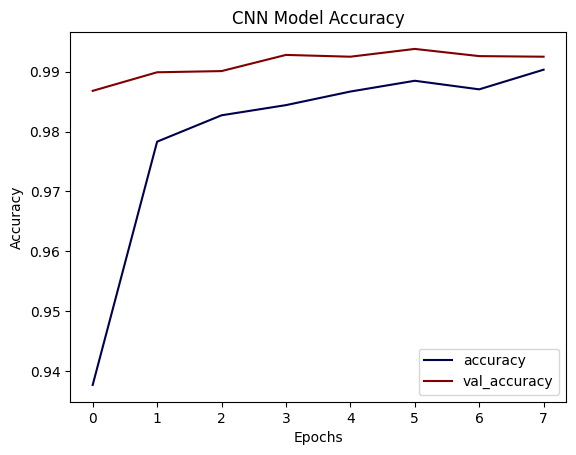

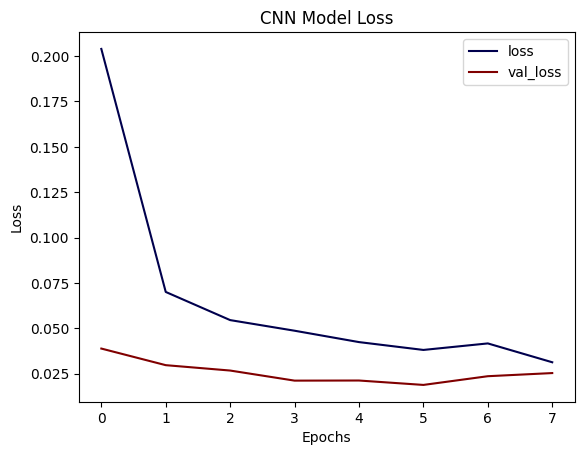

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step


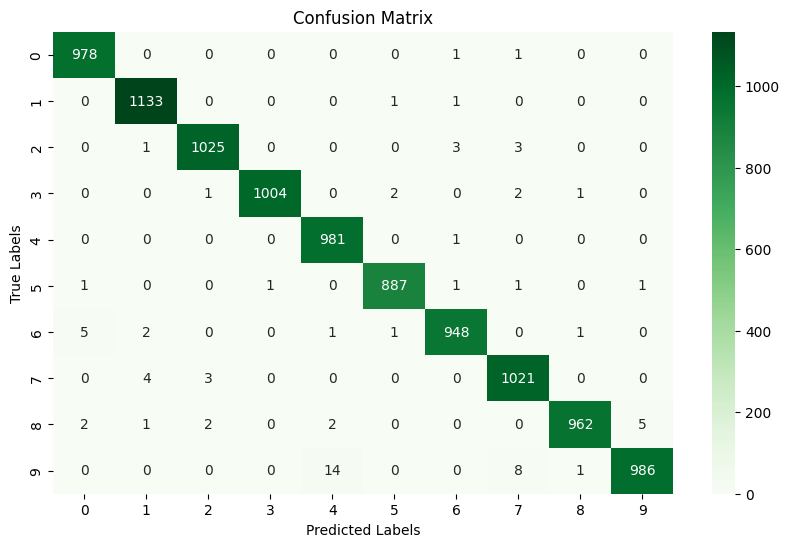

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

metrics = pd.DataFrame(history.history)

# validation accuracy
metrics[['accuracy', 'val_accuracy']].plot(title="CNN Model Accuracy", xlabel="Epochs", ylabel="Accuracy", colormap='seismic')
plt.show()

# validation loss
metrics[['loss', 'val_loss']].plot(title="CNN Model Loss", xlabel="Epochs", ylabel="Loss", colormap='seismic')
plt.show()

# Generate predictions
predictions_prob = cnn_model.predict(x_test)
predictions = np.argmax(predictions_prob, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Generate and display confusion matrix
conf_matrix = confusion_matrix(true_labels, predictions)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=range(10), yticklabels=range(10))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Print classification report
# print("Classification Report:")
# print(classification_report(true_labels, predictions))

### ResNet Model  
> This cell compiles the ResNet model and trains it on the preprocessed MNIST dataset. It tracks training progress through performance metrics, provides the model summary, and displays the test accuracy in percentage.

In [ ]:
# ResNet-like architecture
def create_resnet_like_model():
    inputs = keras.Input(shape=(28, 28, 1))  # Ensure input shape matches (28, 28, 1) for MNIST

    # Convolutional Block
    x = keras.layers.Conv2D(64, (3, 3), activation="relu", padding="same",kernel_initializer="he_normal")(inputs)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.MaxPooling2D((2, 2))(x)

    # Residual Block 1
    shortcut = x
    x = keras.layers.Conv2D(64, (3, 3), activation="relu", padding="same")(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Conv2D(64, (3, 3), activation="relu", padding="same")(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Add()([x, shortcut])  # Add shortcut connection
    x = keras.layers.MaxPooling2D((2, 2))(x)

    # Residual Block 2
    shortcut = keras.layers.Conv2D(128, (1, 1), strides=(1, 1), padding="same")(x)  # Adjust shortcut
    x = keras.layers.Conv2D(128, (3, 3), activation="relu", padding="same")(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Conv2D(128, (3, 3), activation="relu", padding="same")(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Add()([x, shortcut])  # Add shortcut connection
    x = keras.layers.MaxPooling2D((2, 2))(x)

    # Fully Connected Layers
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(256, activation="relu")(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Dropout(0.4)(x)
    outputs = keras.layers.Dense(10, activation="softmax")(x)  # Output layer for 10 classes

    # Create the model
    resnet_model = keras.Model(inputs, outputs, name="ResNet_Like_Numbers_Recognition_Model")
    lr_schedule = keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=0.0005,
        decay_steps=10000,
        decay_rate=0.9
    )
    resnet_model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=lr_schedule),
        loss="categorical_crossentropy",
        metrics=["accuracy"],
    )
    keras.utils.plot_model(
        resnet_model,
        show_shapes=True,
        show_layer_names=True, 
    )

    # Display the model summary
    resnet_model.summary()
    return resnet_model
# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = np.expand_dims(x_train, axis=-1)  
x_test = np.expand_dims(x_test, axis=-1)    
y_train = keras.utils.to_categorical(y_train, 10)  
y_test = keras.utils.to_categorical(y_test, 10)   

resnet_model = create_resnet_like_model()
resnet_history = resnet_model.fit(
    x_train, y_train, epochs=8, batch_size=64, validation_data=(x_test, y_test)
)
resnet_model.save("resnet_like_model.keras")
resnet_test_loss, resnet_test_acc = resnet_model.evaluate(x_test, y_test)
print(f"ResNet-Like Model Test Accuracy: {resnet_test_acc * 100:.2f}%")

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


Model: "ResNet_Like_Numbers_Recognition_Model"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 28, 28,    │        640 │ input_layer_1[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 28, 28,    │        256 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 14, 14,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 14, 14,    │     36,928 │ max_pooling2d_3[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 14, 14,    │        256 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 14, 14,    │     36,928 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 14, 14,    │        256 │ conv2d_5[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 14, 14,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │ max_pooling2d_3[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 7, 7, 64)  │          0 │ add[0][0]         │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 7, 7, 128) │     73,856 │ max_pooling2d_4[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 7, 7, 128) │        512 │ conv2d_7[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 7, 7, 128) │    147,584 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 7, 7, 128) │        512 │ conv2d_8[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 7, 7, 128) │      8,320 │ max_pooling2d_4[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 7, 7, 128) │          0 │ batch_normalizat… │
│                     │                   │            │ conv2d_6[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 3, 3, 128) │          0 │ add_1[0][0]       │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 1152)      │          0 │ max_pooling2d_5[

 Total params: 604,810 (2.31 MB)

 Trainable params: 603,402 (2.30 MB)

 Non-trainable params: 1,408 (5.50 KB)

Epoch 1/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 123s 128ms/step - accuracy: 0.9321 - loss: 0.2231 - val_accuracy: 0.9831 - val_loss: 0.0510
Epoch 2/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 135s 144ms/step - accuracy: 0.9867 - loss: 0.0414 - val_accuracy: 0.9912 - val_loss: 0.0292
Epoch 3/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 122s 130ms/step - accuracy: 0.9920 - loss: 0.0264 - val_accuracy: 0.9895 - val_loss: 0.0328
Epoch 4/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 130s 139ms/step - accuracy: 0.9918 - loss: 0.0253 - val_accuracy: 0.9910 - val_loss: 0.0255
Epoch 5/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 128s 137ms/step - accuracy: 0.9940 - loss: 0.0192 - val_accuracy: 0.9870 - val_loss: 0.0410
Epoch 6/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 124s 132ms/step - accuracy: 0.9956 - loss: 0.0151 - val_accuracy: 0.9895 - val_loss: 0.0314
Epoch 7/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 143s 152ms/step - accuracy: 0.9956 - loss: 0.0133 - val_accuracy: 0.9912 - val_loss: 0.0291
Epoch 8/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 160s 171ms/step - accuracy: 0.9965 - loss: 0

### ResNet: Visualize Training Accuracy & Confusion Matrix
> This cell plots the training and validation loss/accuracy curves, providing insights into the model's learning process over the training epochs.
> It also creates a confusion matrix to visually assess the classification performance and identify any areas of misclassification.

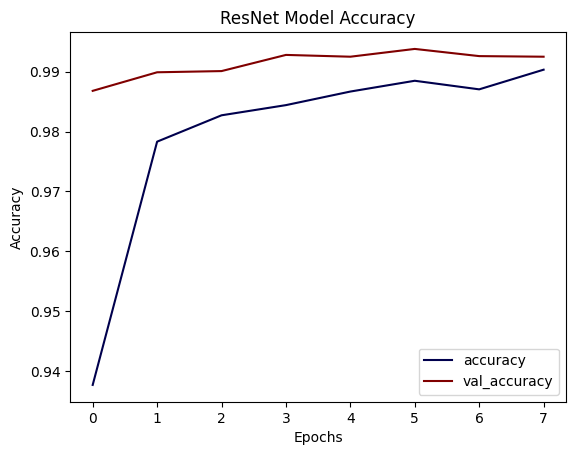

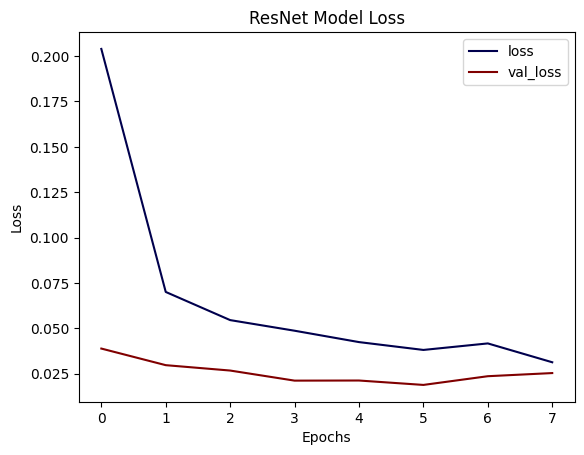

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step


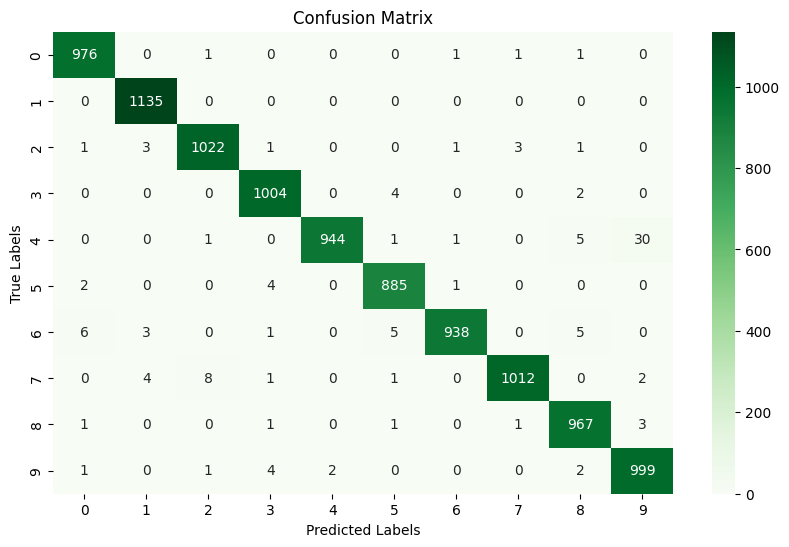

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

metrics = pd.DataFrame(history.history)

# validation accuracy
metrics[['accuracy', 'val_accuracy']].plot(title="ResNet Model Accuracy", xlabel="Epochs", ylabel="Accuracy", colormap='seismic')
plt.show()

# validation loss
metrics[['loss', 'val_loss']].plot(title="ResNet Model Loss", xlabel="Epochs", ylabel="Loss", colormap='seismic')
plt.show()

# Generate predictions
predictions_prob = resnet_model.predict(x_test)
predictions = np.argmax(predictions_prob, axis=1)
true_labels = np.argmax(y_test, axis=1)  # Convert one-hot encoded labels to integers

# Generate and display confusion matrix
conf_matrix = confusion_matrix(true_labels, predictions)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=range(10), yticklabels=range(10))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Print classification report
# print("Classification Report:")
# print(classification_report(true_labels, predictions))

### Import Libraries and Load Dataset
> This cell imports key libraries (TensorFlow, Keras, NumPy, OpenCV, and OS) and defines a function to load the Number Test dataset.


In [22]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt

def main():
    dataset_path = r"D:\SHU\ML_lab\Assesment\Number_Test_Data"
    all_images = [img for img in os.listdir(dataset_path) if img.endswith(".png")]
    image_path = [os.path.join(dataset_path, img_path) for img_path in all_images]
    image_name = [os.path.basename(path) for path in image_path]
    print(image_name)
    return image_path


image_path = main()

['000.png', '001.png', '002.png', '003.png', '004.png', '005.png', '006.png', '007.png', '008.png', '009.png', '010.png', '011.png', '012.png', '013.png', '014.png']


#### Data Preprocessing: First 10 Files
> This cell performs the necessary data preprocessing on the MNIST dataset, including grayscale. These 10 files already match the model's input requirements, so they were passed as-is to the training model.



Processing raw image D:\SHU\ML_lab\Assesment\Number_Test_Data\000.png


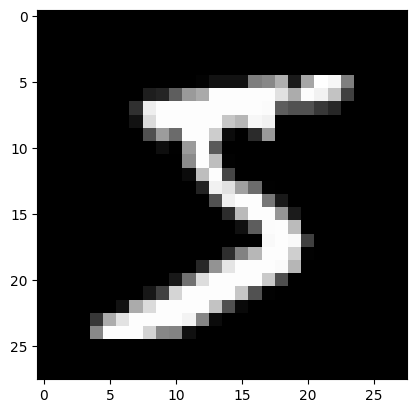

Processing raw image D:\SHU\ML_lab\Assesment\Number_Test_Data\001.png


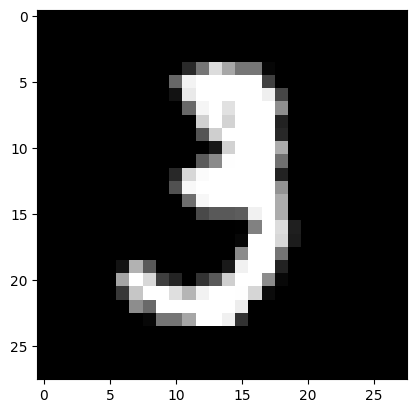

Processing raw image D:\SHU\ML_lab\Assesment\Number_Test_Data\002.png


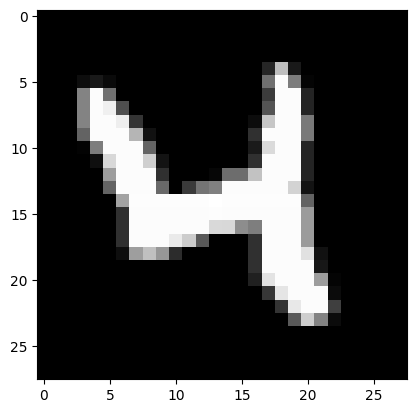

Processing raw image D:\SHU\ML_lab\Assesment\Number_Test_Data\003.png


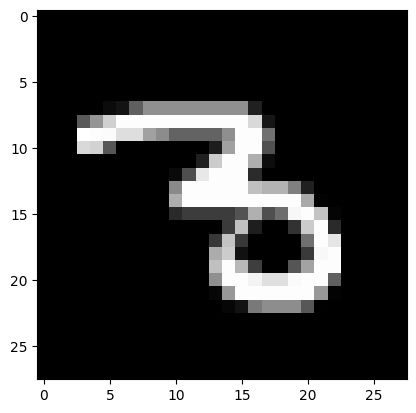

Processing raw image D:\SHU\ML_lab\Assesment\Number_Test_Data\004.png


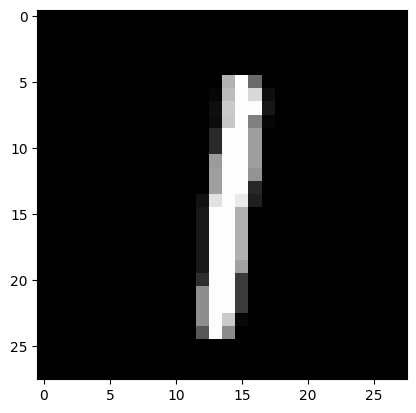

Processing raw image D:\SHU\ML_lab\Assesment\Number_Test_Data\005.png


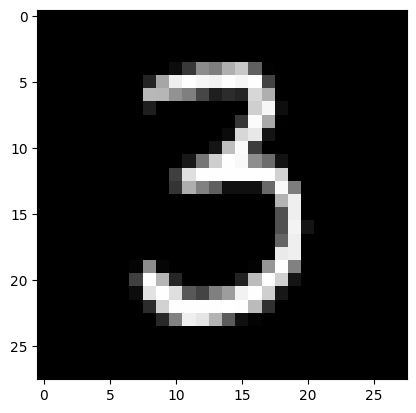

Processing raw image D:\SHU\ML_lab\Assesment\Number_Test_Data\006.png


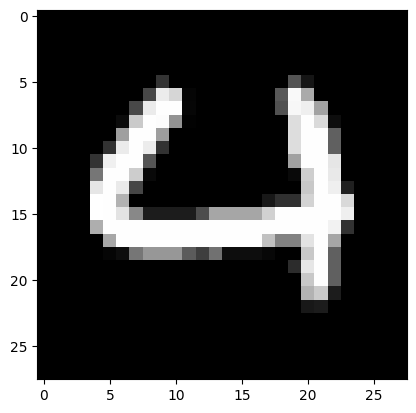

Processing raw image D:\SHU\ML_lab\Assesment\Number_Test_Data\007.png


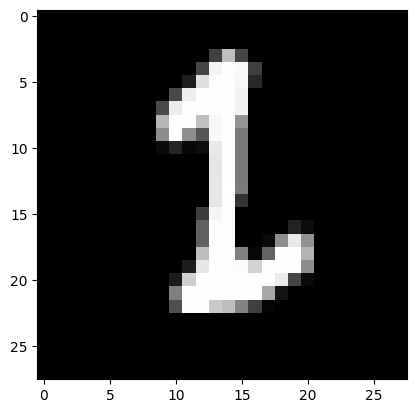

Processing raw image D:\SHU\ML_lab\Assesment\Number_Test_Data\008.png


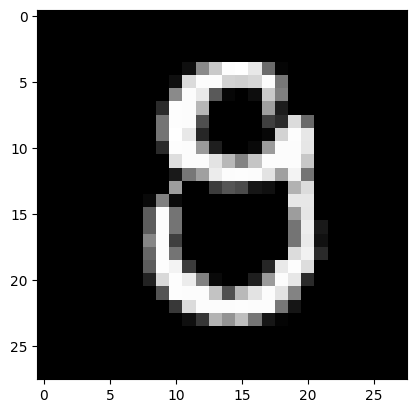

Processing raw image D:\SHU\ML_lab\Assesment\Number_Test_Data\009.png


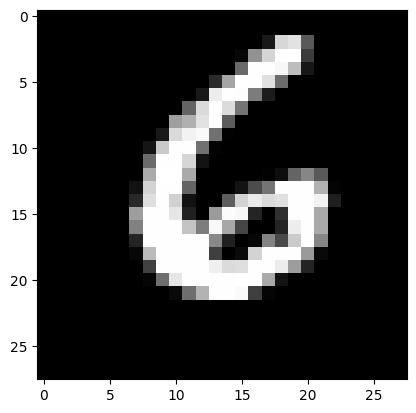

In [23]:
global tendigit_images
tendigit_images = []


def digit_images(image_path):
    for image in image_path[:10]:
        print(f"Processing raw image {image}")

        image = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
        # resize_digit = cv2.resize(image, (28, 28), interpolation= cv2.INTER_AREA)
        # np_digit = resize_digit.astype(np.float32) / 255.0
        # blur_digit = cv2.GaussianBlur(np_digit, (3, 3), 0)
        # image = np.expand_dims(blur_digit, axis=-1)
        plt.imshow(image, cmap="gray")
        plt.show()
        # print(f"Loaded image shape: {image.shape}")  # shape of the raw image
        tendigit_images.append(image)

    return tendigit_images


digit_images(image_path);

### Data Preprocessing: 11th File
> This cell handles the preprocessing of the 11th file by converting it to grayscale, applying erosion, performing binary thresholding etc. It also runs the contour detection to identify the numerical regions.


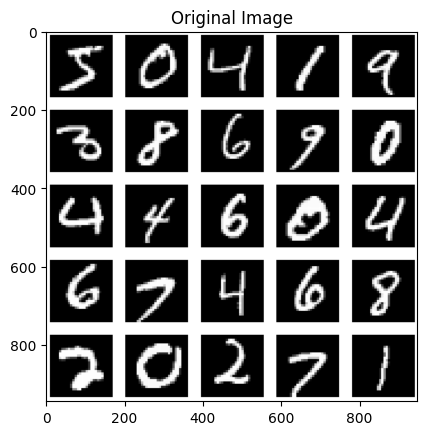

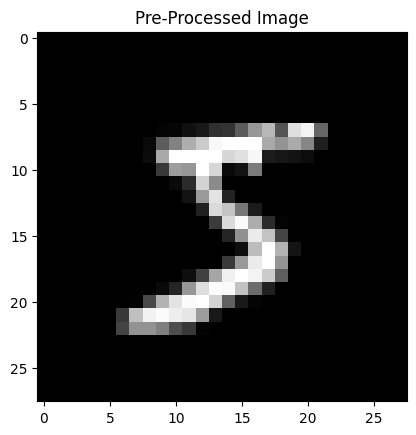

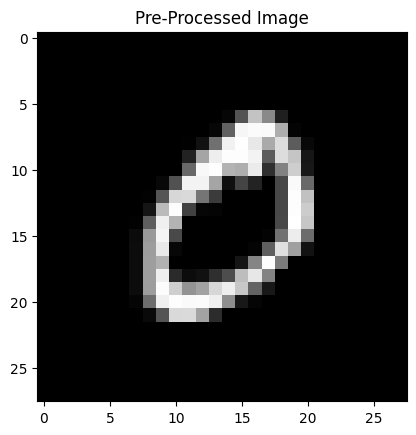

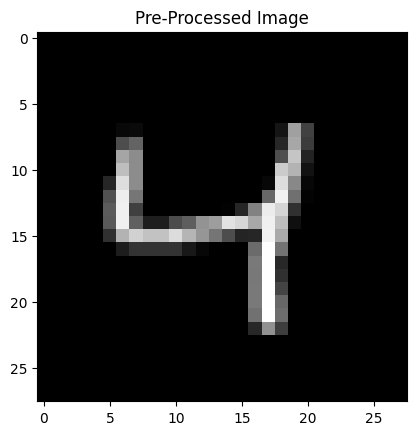

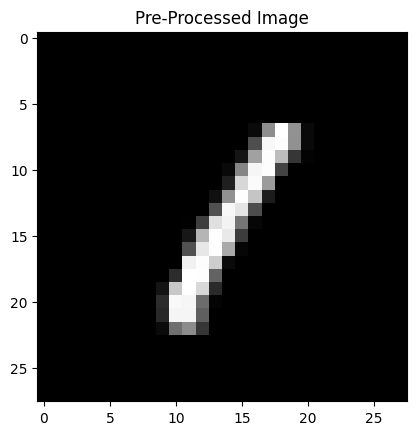

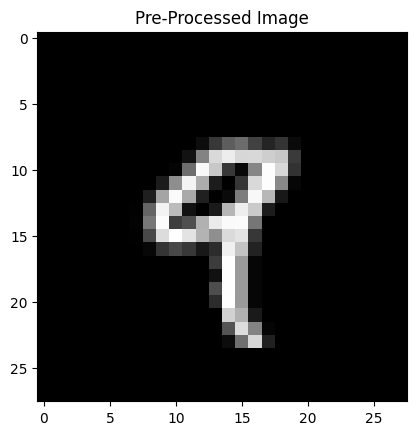

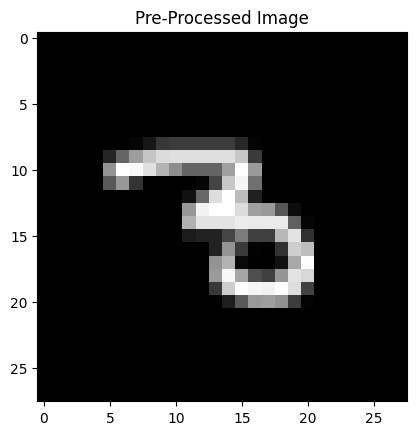

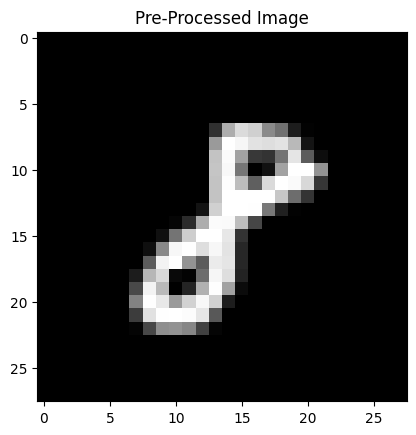

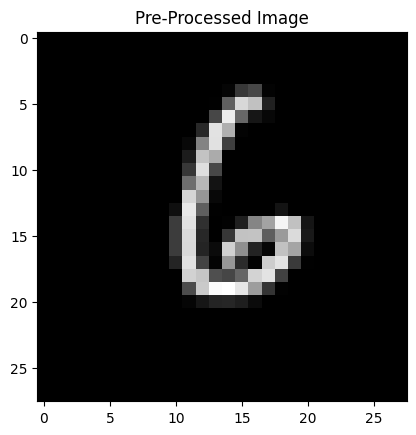

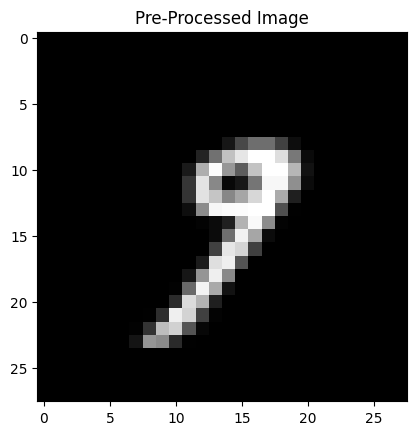

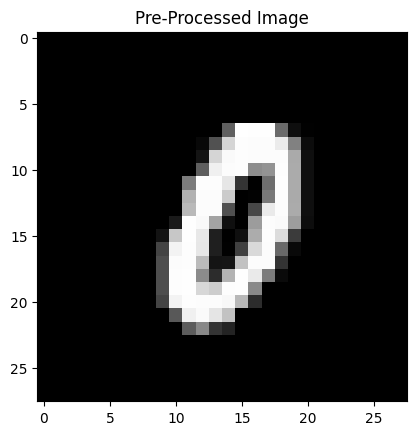

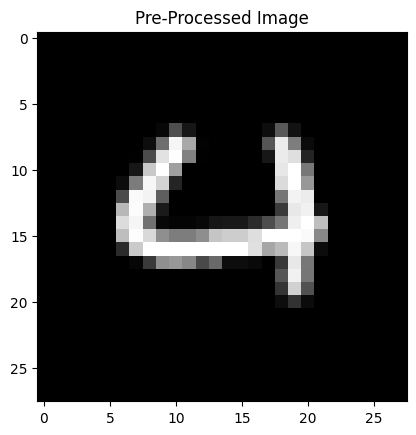

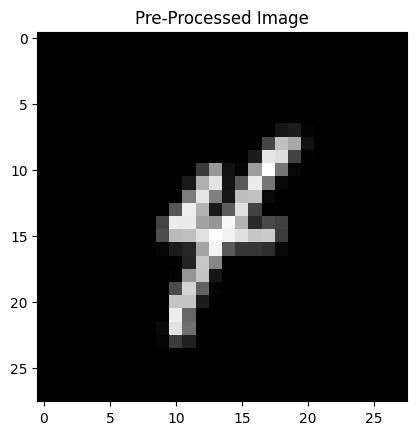

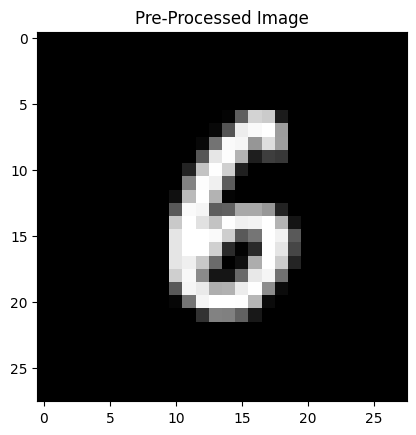

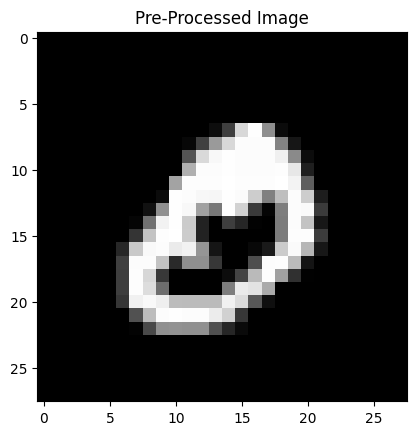

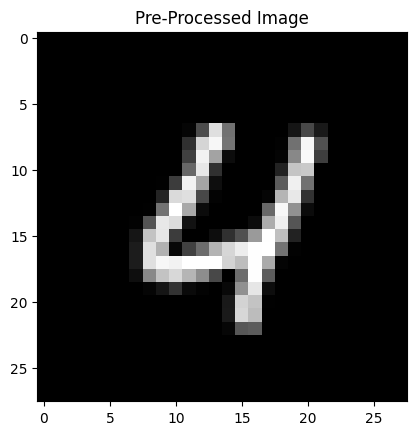

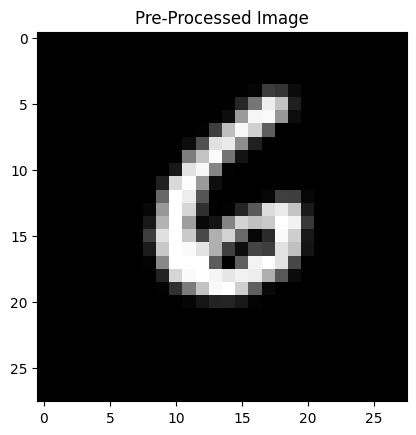

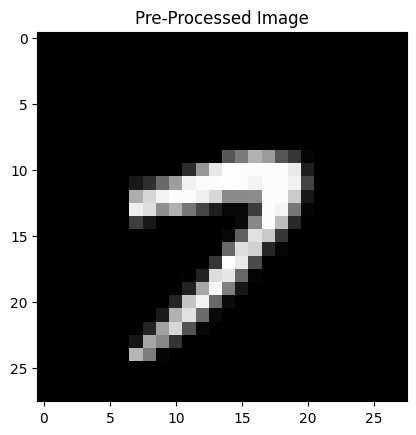

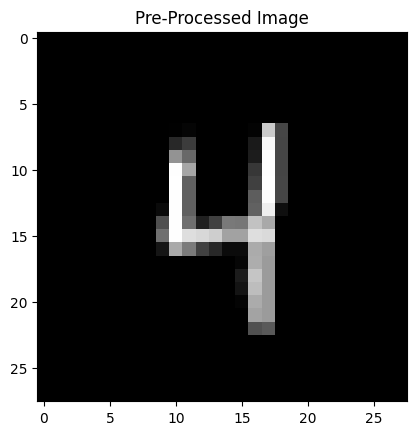

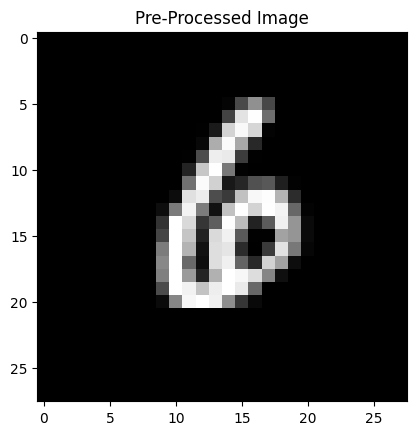

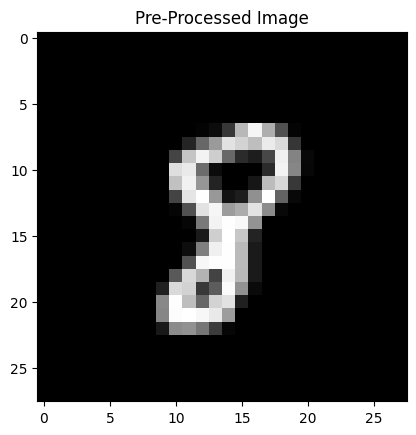

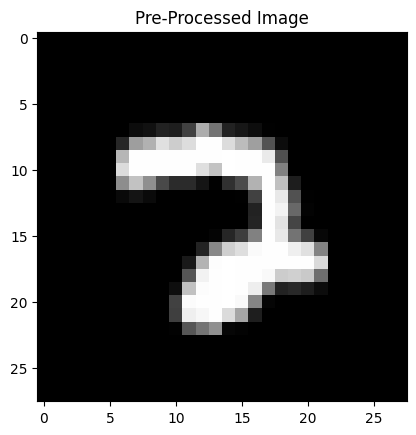

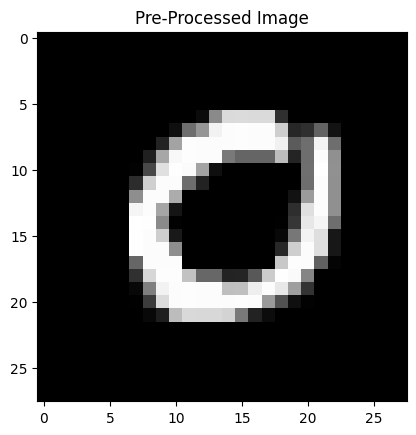

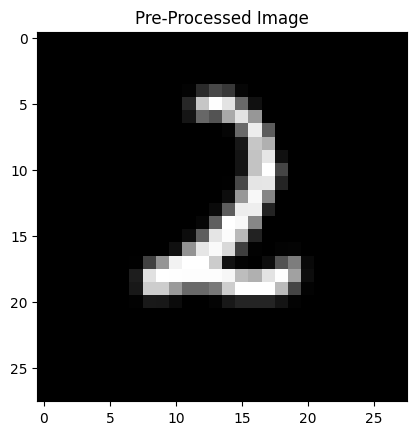

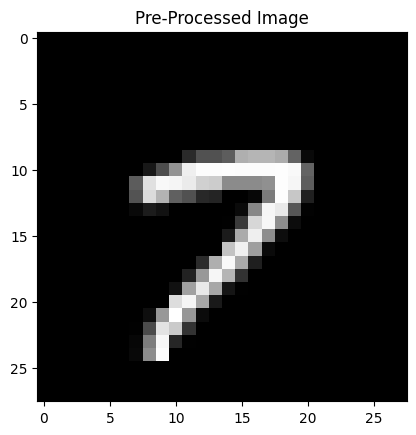

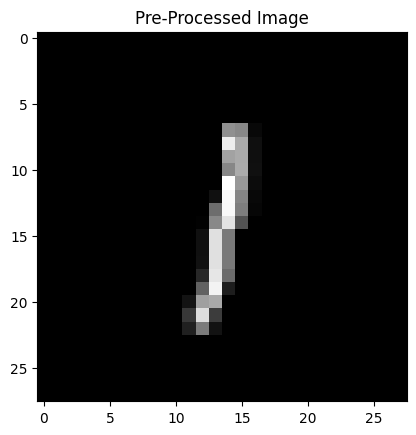

In [24]:
def find_counters(image, binary, min_area=0, max_area=0):
    edges = cv2.Canny(binary, 100, 200)
    kernel = np.ones((3, 3), np.uint8)
    dilated = cv2.dilate(edges, kernel, iterations=1)
    eroded = cv2.erode(dilated, kernel, iterations=1)
    
    contours, hierarchy = cv2.findContours(
        eroded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    )

    if len(contours) == 0:
        return contours

    if min_area != 0 and max_area != 0:
        contours = [
            contour
            for contour in contours
            if min_area <= cv2.contourArea(contour) <= max_area
        ]

    bounding_boxes = [cv2.boundingRect(c) for c in contours]
    sorted_contours = sorted(
        zip(contours, bounding_boxes),
        key=lambda b: (b[1][1] // 50, b[1][0])  # Sort by row (y) and then column (x)
    )
    contours = [c[0] for c in sorted_contours]
    return contours


def preprocess_digitGrid(image_path):
    for image in image_path[10:11]:
        # print(image)
        image = cv2.imread(image)
        plt.imshow(image)
        plt.title("Original Image")
        plt.show()
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        blurred = cv2.GaussianBlur(gray, (5, 5), 2)
        _, binary = cv2.threshold(blurred, 128, 255, cv2.THRESH_BINARY_INV)
        # Find contours that likely correspond to digits
        contours = find_counters(image.copy(), binary)
        processed_digits = []
        for contour in contours:
            x, y, w, h = cv2.boundingRect(contour)
            digit_roi = gray[y : y + h, x : x + w]
            resized_digit = cv2.resize(digit_roi, (28, 28))
            height, width = resized_digit.shape
            padded_image = np.zeros((height + 8, width + 8), dtype=np.uint8)
            padded_image[4 : height + 4, 4 : width + 4] = resized_digit
            final_image = cv2.resize(padded_image, (28, 28))
            processed_image = final_image.astype("float32") / 255.0
            processed_image = processed_image.reshape(28, 28, 1)

            processed_digits.append(((x, y, w, h), processed_image))
            plt.imshow(final_image, cmap="gray")
            plt.title("Pre-Processed Image")
            plt.grid(False)
            plt.show()  

        return processed_digits


processed_digits= preprocess_digitGrid(image_path);

### Data Preprocessing: 12th File
> Same as 11th file, This cell handles the preprocessing of the 11th file by converting it to grayscale, applying erosion, performing binary thresholding etc. It also runs the contour detection to identify the numerical regions.


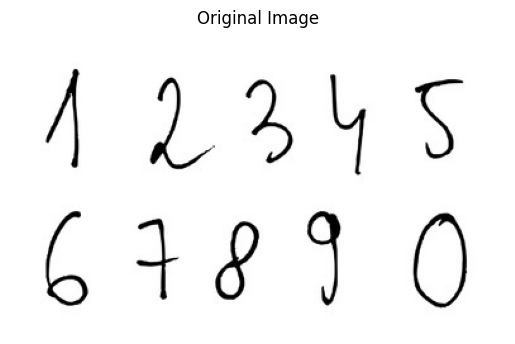

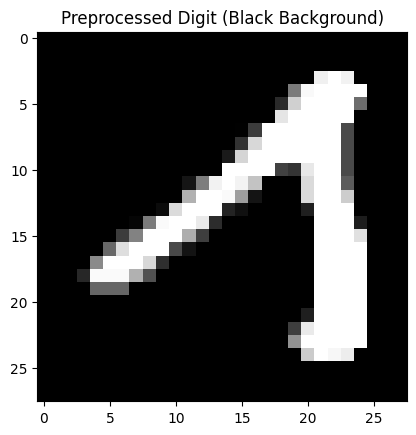

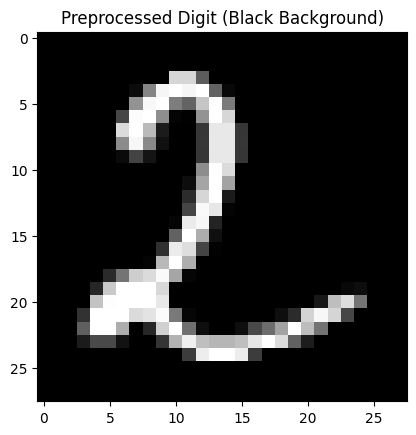

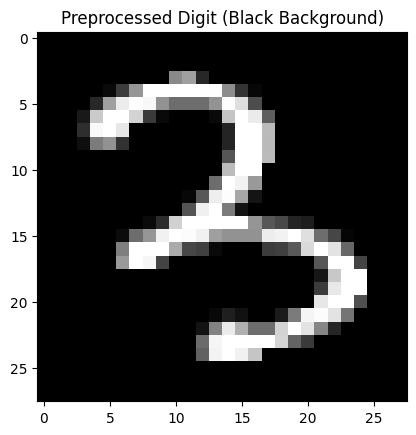

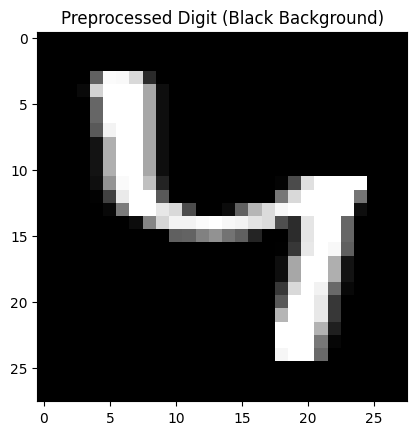

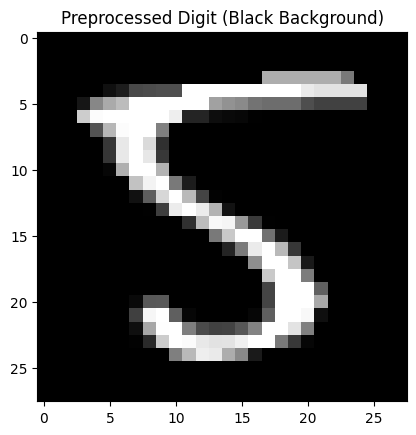

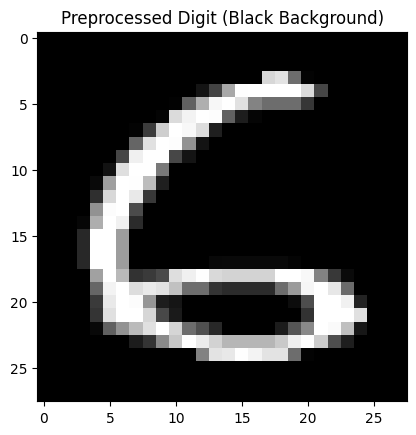

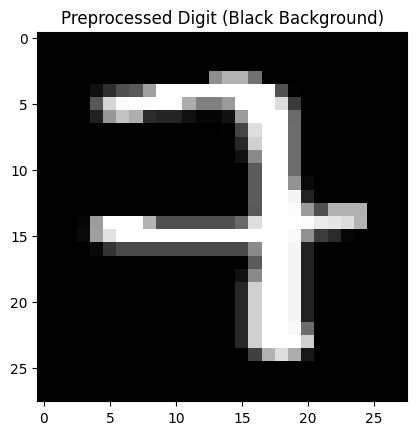

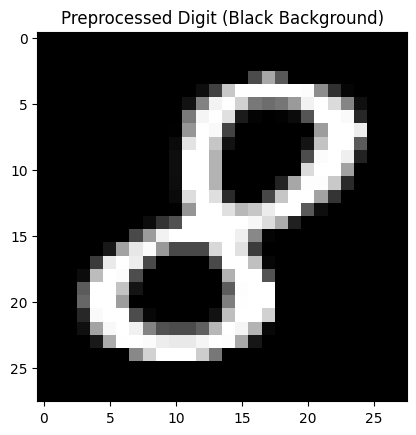

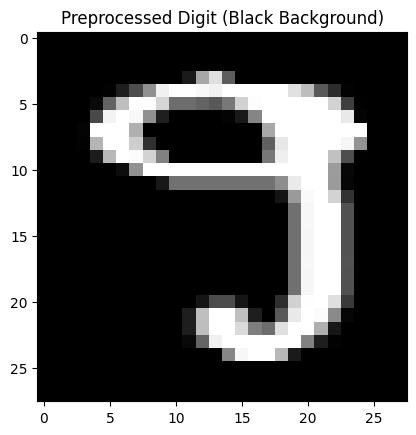

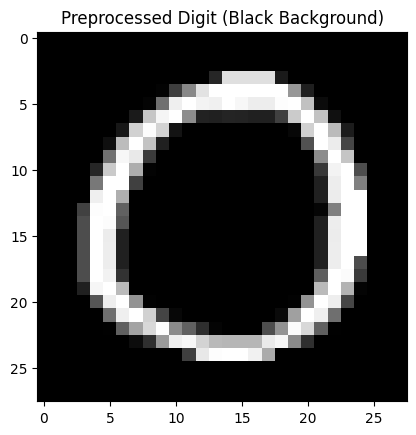

In [25]:
def find_counters(image, binary, min_area=0, max_area=0):
    edges = cv2.Canny(binary, 100, 200)
    kernel = np.ones((3, 3), np.uint8)
    dilated = cv2.dilate(edges, kernel, iterations=1)
    eroded = cv2.erode(dilated, kernel, iterations=1)
    contours, hierarchy = cv2.findContours(
        eroded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    )

    if len(contours) == 0:
        return contours

    if min_area != 0 and max_area != 0:
        contours = [
            contour
            for contour in contours
            if min_area <= cv2.contourArea(contour) <= max_area
        ]
    # Sort contours top-to-bottom and left-to-right
    bounding_boxes = [cv2.boundingRect(c) for c in contours]
    sorted_contours = sorted(
        zip(contours, bounding_boxes),
        key=lambda b: (b[1][1] // 50, b[1][0])  # Sort by row (y) and then column (x)
    )
    contours = [c[0] for c in sorted_contours]
    return contours

def preprocess_whitebg(image_paths):
    processed_white_bg = []
    

    for image in image_paths[11:12]:
        image = cv2.imread(image)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title("Original Image")
        plt.axis("off")
        plt.show()
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        blur = cv2.GaussianBlur(gray, (5, 5),4)
        thresholded_img = cv2.adaptiveThreshold(
            blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
            cv2.THRESH_BINARY_INV, 99, 45
        )
        contours = find_counters(image.copy(), thresholded_img)

        for contour in contours:
            x, y, w, h = cv2.boundingRect(contour)
            digit_roi = thresholded_img[y:y + h, x:x + w]
            resized_digit = cv2.resize(digit_roi, (28, 28))

            # Add padding to the resized digit
            height, width = resized_digit.shape
            padded_image = np.zeros((height + 8, width + 8), dtype=np.uint8)
            padded_image[4:height + 4, 4:width + 4] = resized_digit
            final_image = cv2.resize(padded_image, (28, 28))
            processed_image = final_image.astype("float32") / 255.0
            processed_white_bg.append(((x, y, w, h), processed_image))

            # Display the preprocessed digit
            plt.imshow(final_image, cmap="gray")
            plt.title("Preprocessed Digit (Black Background)")
            plt.axis("on")
            plt.show()

    return processed_white_bg          

processed_white_bg = preprocess_whitebg(image_path);

Loads trained CNN and ResNet model predicts digits from preprocessed images.

### Predictions : First 10 Files
> This cell utilizes the trained model to predict numbers on the test dataset. It compares the predicted results and visualizes the outcomes to assess the model's performance.


Image shape before prediction: (1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


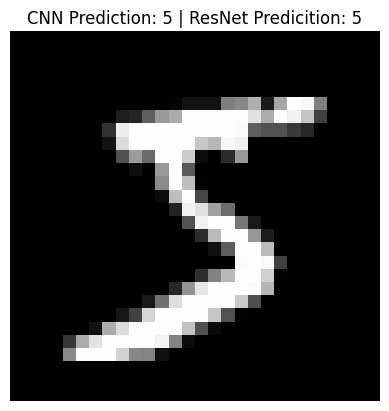

Image shape before prediction: (1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


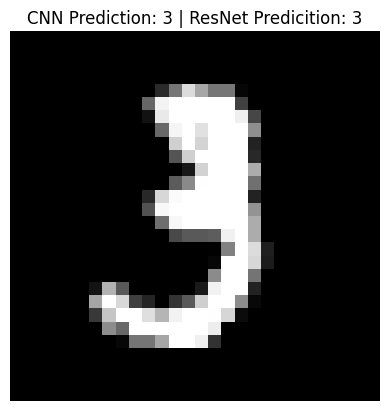

Image shape before prediction: (1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


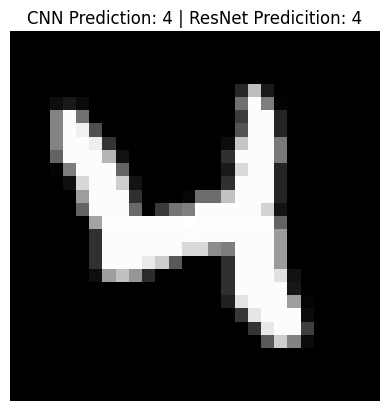

Image shape before prediction: (1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


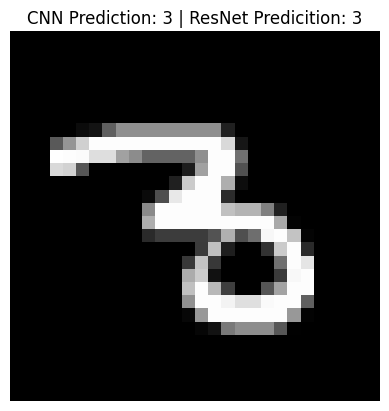

Image shape before prediction: (1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


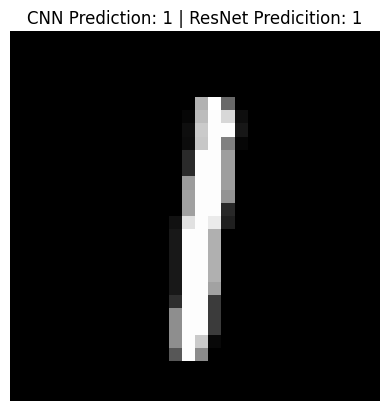

Image shape before prediction: (1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


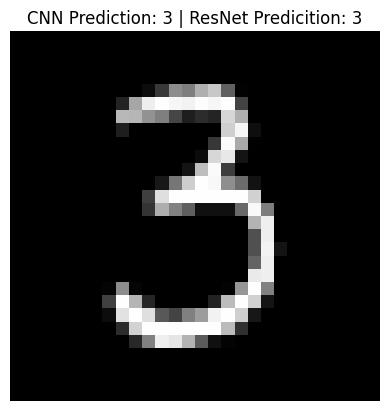

Image shape before prediction: (1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


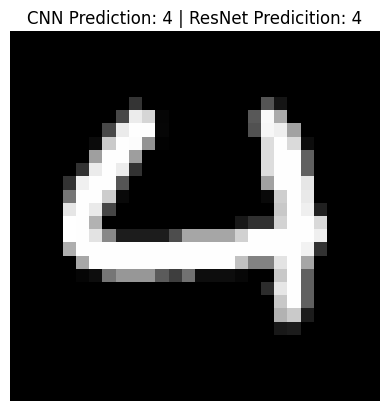

Image shape before prediction: (1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


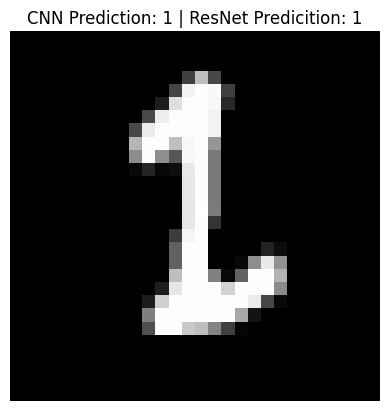

Image shape before prediction: (1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


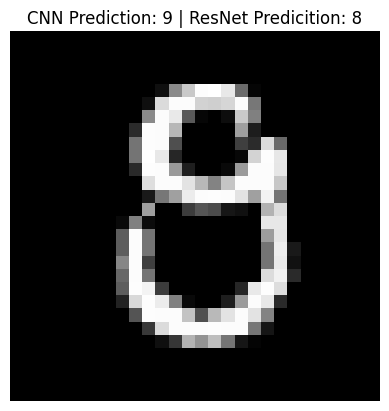

Image shape before prediction: (1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


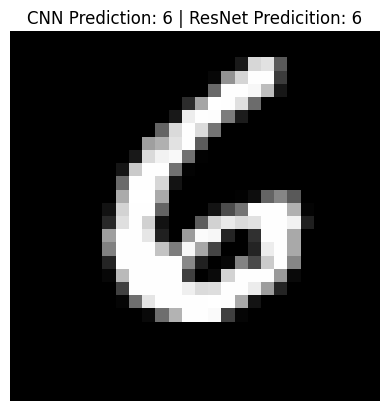

In [26]:
def load_model_and_predict(tendigit_images):
    cnn_model = keras.models.load_model("mnist_cnn_model_improved.h5")  # Load trained cnn model
    cnn_predictions = []
    resnet_model = keras.models.load_model("resnet_like_model.keras")  # Load trained ResNet model
    resnet_predictions = []

    for img in tendigit_images:
        # img = img / 255.0  # Normalize
        # img = cv2.resize(img, (28, 28))
        # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # print(f"Loaded img shape: {img.shape}")

        img = img.reshape(1, 28, 28, 1) / 255.0
        print("Image shape before prediction:", img.shape)
        cnn_pred_probs = cnn_model.predict(img)  
        cnn_pred_digit = np.argmax(cnn_pred_probs) 
        resnet_pred_probs = resnet_model.predict(img) 
        resnet_pred_digit = np.argmax(resnet_pred_probs) 
        # print(f"Raw Model Output: {pred_probs}")  # Print confidence scores
        # print(f"Predicted Digit: {pred_digit}")

        cnn_predictions.append(cnn_pred_digit)
        resnet_predictions.append(resnet_pred_digit)
        plt.imshow(img.squeeze(), cmap="gray")
        plt.title(f"CNN Prediction: {cnn_pred_digit} | ResNet Predicition: {resnet_pred_digit}")
        plt.axis("off")
        plt.grid(False)
        plt.show()


load_model_and_predict(tendigit_images);

### Predictions: 11th File

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━

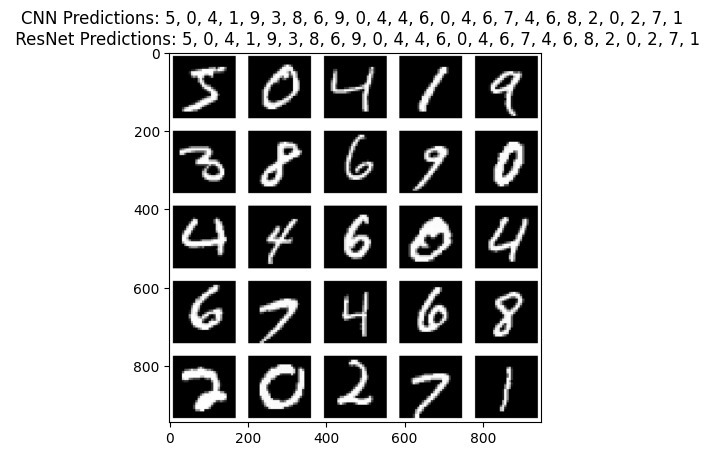

In [27]:
def predict_digitsgrid(processed_digits, cnn_model, resnet_model):
    # model = keras.models.load_model("mnist_model.h5")
    cnn_predictions = []
    resnet_predictions =[]
    for image in image_path[10:11]:
        image = cv2.imread(image)
        

        for (x, y, w, h), digit_image in processed_digits:
            digit_input = np.expand_dims(digit_image, axis=0)
            cnn_pred_probs = cnn_model.predict(digit_input)  
            cnn_pred_digit = np.argmax(cnn_pred_probs)  # Get highest probability digit
            resnet_pred_probs = resnet_model.predict(digit_input)  # Get probability distribution
            resnet_pred_digit = np.argmax(resnet_pred_probs) 
            cnn_predictions.append(cnn_pred_digit)
            resnet_predictions.append(resnet_pred_digit)

    return cnn_predictions, resnet_predictions, image

# processed_digits, image = preprocess_digitGrid(image_path)

cnn_model = keras.models.load_model("mnist_cnn_model_improved.h5")  # Load trained  cnn model
resnet_model = keras.models.load_model("resnet_like_model.keras")  # Load trained ResNet model
cnn_predictions, resnet_predicitions, img = predict_digitsgrid(processed_digits, cnn_model, resnet_model)

# Display the annotated image (convert BGR to RGB for display in matplotlib)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title(f"CNN Predictions: {', '.join(map(str, cnn_predictions))} \n ResNet Predictions: {', '.join(map(str, resnet_predicitions))}")
plt.grid(False)
plt.show()

### Predictions : 12th File

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


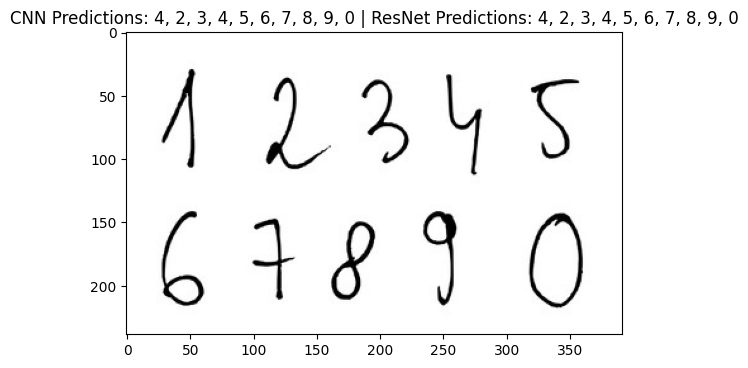

In [28]:
def predict_whitebg(processed_white_bg, cnn_model, resnet_model):
    # model = keras.models.load_model("mnist_model.h5")
    cnn_whitebg_predictions, resnet_whitebg_predictions = [], []
    for image in image_path[11:12]:
        # Convert to grayscale and apply blur
        image = cv2.imread(image)
        

        for (x, y, w, h), digit_image in processed_white_bg:
            # Prepare the image for prediction (add batch dimension)
            digit_input = np.expand_dims(digit_image, axis=0)
            cnn_pred_probs = cnn_model.predict(digit_input)  
            cnn_pred_digit = np.argmax(cnn_pred_probs) 
            resnet_pred_probs = resnet_model.predict(digit_input) 
            resnet_pred_digit = np.argmax(resnet_pred_probs) 
            cnn_whitebg_predictions.append(cnn_pred_digit)
            resnet_whitebg_predictions.append(resnet_pred_digit)           

    return cnn_whitebg_predictions, resnet_whitebg_predictions, image




cnn_model = keras.models.load_model("mnist_cnn_model_improved.h5")  # Load trained  cnn model
resnet_model = keras.models.load_model("resnet_like_model.keras")  # Load trained ResNet model
# cnn_predictions, img = predict_whitebg(processed_white_bg, cnn_model)
# resnet_predictions, _ = predict_whitebg(processed_white_bg, resnet_model)
cnn_whitebg_predictions, resnet_whitebg_predictions, image = predict_whitebg(processed_white_bg, cnn_model, resnet_model)
# Display Predictions
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title(f"CNN Predictions: {', '.join(map(str, cnn_whitebg_predictions))} | ResNet Predictions: {', '.join(map(str, resnet_whitebg_predictions))}")
plt.grid(False)
plt.show()


### Handwritten Digit Recognition Pipeline: 13, 14, 15 Files
>This script processes a custom processed (Pipline) for handwritten digit images using OpenCV and TensorFlow, performing preprocessing (resizing, contrast enhancement, thresholding, and line removal) before extracting digits. The extracted digits are classified using trained CNN and ResNet models. The predictions are displayed alongside the original images for visualization.  


['D:\\SHU\\ML_lab\\Assesment\\Number_Test_Data\\012.png', 'D:\\SHU\\ML_lab\\Assesment\\Number_Test_Data\\013.png', 'D:\\SHU\\ML_lab\\Assesment\\Number_Test_Data\\014.png']
['012.png', '013.png', '014.png']
Processing image 12 with custom process
Running step: load_images with kwargs: {}
Running step: resized_images with kwargs: {}
Running step: enhance_contrast with kwargs: {'clip_limit': 2.0}
Running step: apply_threshold with kwargs: {'method': 'adaptive', 'threshold': 30}
Applying thresholding method: adaptive, threshold: 30


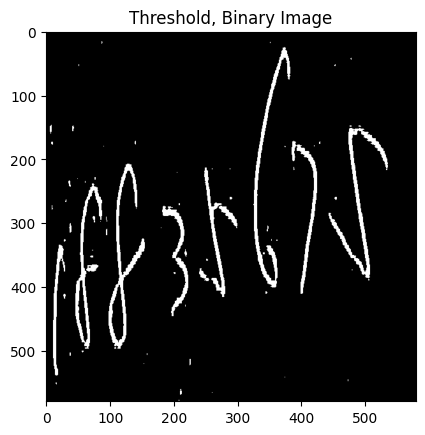

Running step: extract_digits with kwargs: {'area': 500}


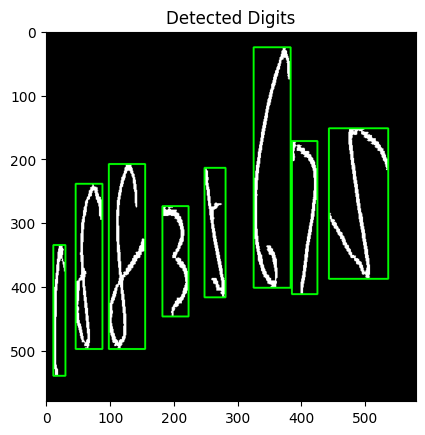

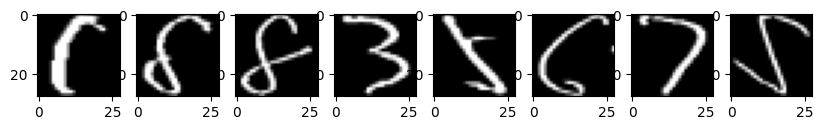

Image shape before prediction: (1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
Image shape before prediction: (1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Image shape before prediction: (1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Image shape before prediction: (1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Image shape before prediction: (1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Image shape before prediction: (1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Image shape before prediction: (1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Image shape before prediction: (1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Processing image 13 wi

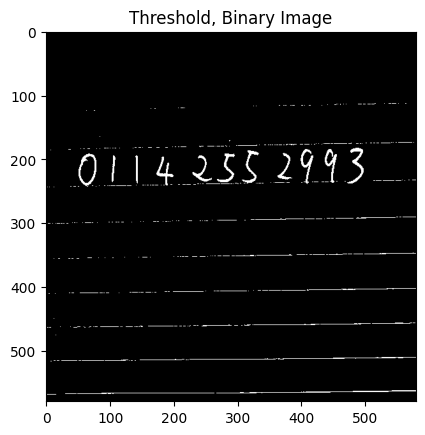

Running step: remove_lines with kwargs: {'method': 'houghLine'}
Running step: apply_erosion_dilation with kwargs: {}


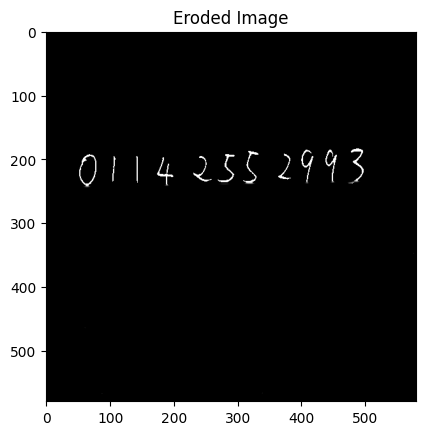

Running step: extract_digits with kwargs: {'area': 30}


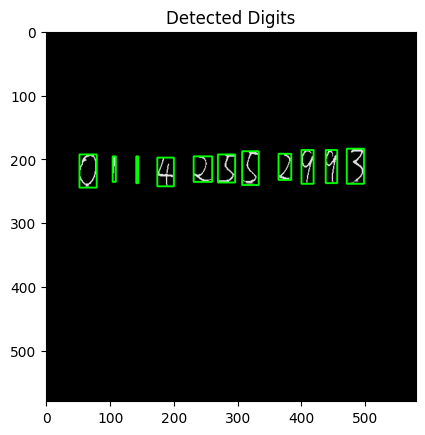

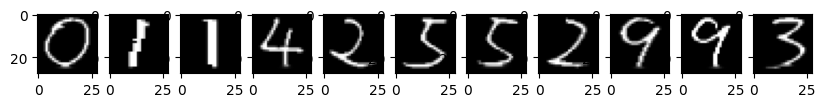

Image shape before prediction: (1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
Image shape before prediction: (1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Image shape before prediction: (1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Image shape before prediction: (1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Image shape before prediction: (1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Image shape before prediction: (1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Image shape before prediction: (1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Image shape before prediction: (1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Image shape before pre

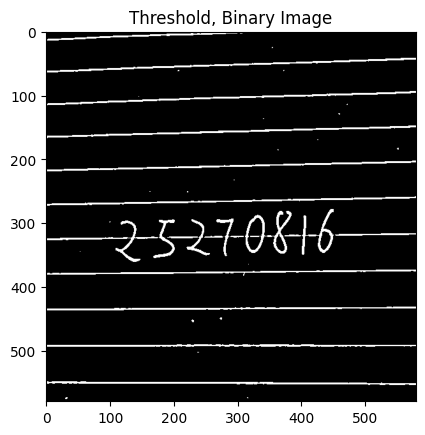

Running step: remove_lines with kwargs: {'method': 'houghLine'}
Running step: apply_erosion_dilation with kwargs: {}


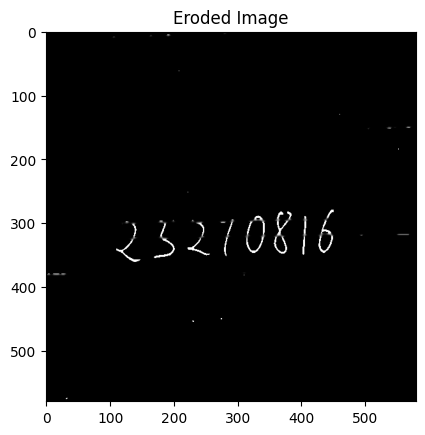

Running step: extract_digits with kwargs: {'area': 70}


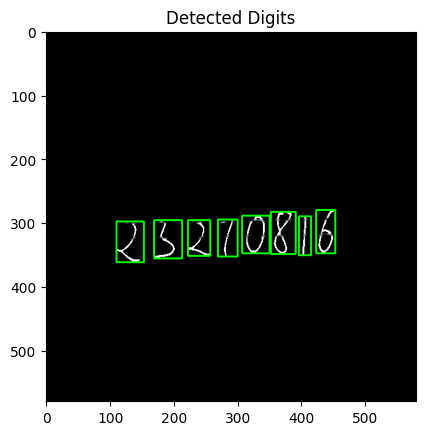

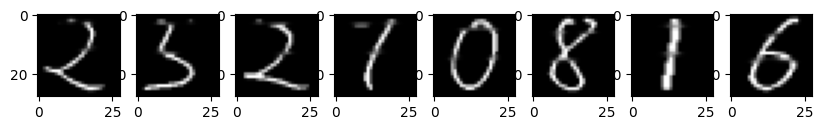

Image shape before prediction: (1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
Image shape before prediction: (1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Image shape before prediction: (1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Image shape before prediction: (1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Image shape before prediction: (1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Image shape before prediction: (1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Image shape before prediction: (1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Image shape before prediction: (1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


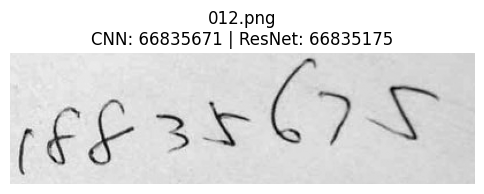

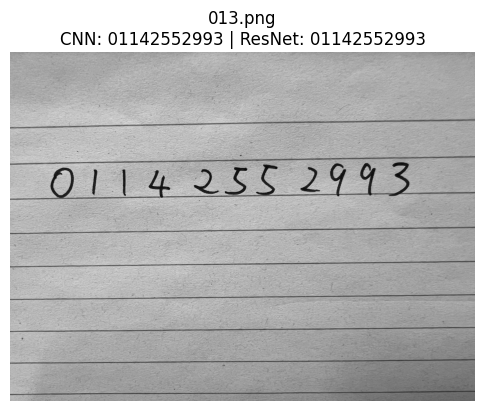

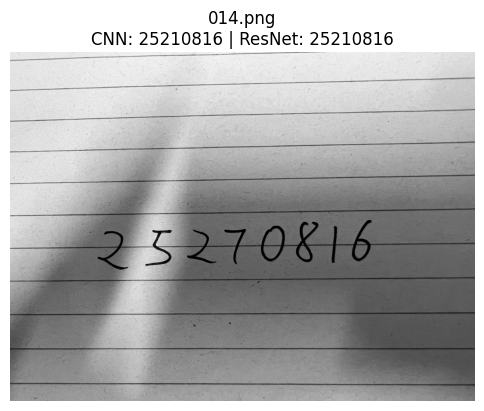

In [29]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt


# Load remaining images
def load_images(image):
    image = cv2.imread(image)
    return image

# Load, resize and grayscale the images
def resized_images(image):
    resized_image = cv2.resize(image, (580, 580), interpolation=cv2.INTER_AREA)

    gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
    # cv2.imshow("Image", gray_image)
    # cv2.waitKey(0)
    return gray_image


# Apply CLAHE for contrast enhancement
def enhance_contrast(image, clip_limit=2.0):

    clahe = cv2.createCLAHE(clip_limit, tileGridSize=(11, 11))
    enhanced_image = clahe.apply(image)
    # cv2.imshow("Enhanced Image", enhanced_image)
    # cv2.waitKey(0)
    return enhanced_image


# Apply either binary or adaptive thresholding.
def apply_threshold(image, method, threshold):

    print(f"Applying thresholding method: {method}, threshold: {threshold}")
    if method == "13_binary":
        _, bin_img = cv2.threshold(image, threshold, 225, cv2.THRESH_BINARY_INV)
    elif method == "adaptive":
        bin_img = cv2.GaussianBlur(image, (5, 5), 0)
        bin_img = cv2.adaptiveThreshold(
            bin_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 25, 12
        )
    else:
        bin_img = image

    plt.imshow(bin_img, cmap="gray")
    plt.title("Threshold, Binary Image")
    plt.show()
    return bin_img


# Detect and remove lines using Hough Line Transform
def remove_lines(thresholded_image, method):

    if method == "houghLine":
        lines = cv2.HoughLinesP(
            thresholded_image, 1, np.pi / 180, 100, minLineLength=5, maxLineGap=90
        )
        mask = np.zeros_like(thresholded_image)
        if lines is not None:
            for line in lines:
                x1, y1, x2, y2 = line[0]
                cv2.line(mask, (x1, y1), (x2, y2), (255), 2)
        thresholded_image = cv2.inpaint(thresholded_image, mask, 3, cv2.INPAINT_TELEA)

    elif method == "kernelLine":
        line_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (40, 1))
        detected_lines = cv2.morphologyEx(
            thresholded_image, cv2.MORPH_OPEN, line_kernel, iterations=1
        )
        cnts_lines, _ = cv2.findContours(
            detected_lines, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
        )
        for c in cnts_lines:
            cv2.drawContours(thresholded_image, [c], -1, (0) - 1)

    # cv2.imshow("Lines Removed", thresholded_image)
    # cv2.waitKey(0)
    return thresholded_image


# Optional: Apply a slight erosion to separate merged digits
def apply_erosion_dilation(thresholded_image):

    kernel_small = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
    thresholded_image = cv2.erode(thresholded_image, kernel_small, iterations=1)
    plt.imshow(thresholded_image, cmap="gray")
    plt.title("Eroded Image")
    plt.show()
    return thresholded_image


# extract digits from images
def extract_digits(thresholded_image, area):
    # Debug: Visualize contours
    contours, _ = cv2.findContours(
        thresholded_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    )
    # debug_image = cv2.cvtColor(thresholded_image.copy(), cv2.COLOR_GRAY2BGR)

    for c in contours:

        # Filter out too-small or too-large bounding boxes
        areas = cv2.contourArea(c)
        if areas < area:
            cv2.drawContours(thresholded_image, [c], -1, (0), -1)
        countors = [c for c in contours if cv2.contourArea(c) > area]
        # Sort by y first (for multiple rows) then x (for left-to-right)
        countors.sort(key=lambda x: cv2.boundingRect(x)[0])
        # countors.sort(key=lambda x: (cv2.boundingRect(x)[1], cv2.boundingRect(x)[0]))

        # bounding_boxes = sorted(
        #     bounding_boxes,
        #     key=lambda b: (round((b[1] + b[3] / 2) / 30), b[0] + b[2] / 2)
        # )

    # Draw green bounding boxes for visualization
    debug_image = cv2.cvtColor(thresholded_image.copy(), cv2.COLOR_GRAY2BGR)
    for cnt in countors:
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(debug_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    plt.imshow(debug_image, cmap="gray")
    plt.title("Detected Digits")
    plt.show()

    digits = []
    for cnt in countors:
        x, y, w, h = cv2.boundingRect(cnt)
        padding = 5
        x_start = max(0, x - padding)
        y_start = max(0, y - padding)
        x_end = min(thresholded_image.shape[1], x + w + padding)
        y_end = min(thresholded_image.shape[0], y + h + padding)

        digit = thresholded_image[y_start:y_end, x_start:x_end]
        digit = cv2.resize(
            digit, (28, 28), interpolation=cv2.INTER_AREA
        )  # Resize to 28x28
        # digit = digit.astype(np.float32) / 255.0 # Normalize to 0-1 range
        # digit = cv2.GaussianBlur(digit, (3, 3), 0)  #gaussian blur
        # digit = np.expand_dims(digit, axis=-1)  # Add channel dimension

        digits.append(digit)

    plt.figure(figsize=(10, 2))
    for i, digit_image in enumerate(digits):
        plt.subplot(1, len(digits), i + 1)
        plt.imshow(digit_image, cmap="gray")
        plt.axis("on")
    plt.show()
    return digits


# Run a series of processing steps defined by the pipeline on an image
def process_image(image, pipeline):

    try:
        print(f"Processing image: {image}")

        if image is None:
            raise ValueError(f"Unable to load image: {image}")

        for step in pipeline:
            func = step["func"]
            kwargs = step.get("kwargs", {})
            print(f"Running step: {func.__name__} with kwargs: {kwargs}")
            image = func(image, **kwargs)

        return image
    except Exception as e:
        print(f"Error processing image {image}: {e}")


# Process the image - extract digit regions
def process_and_extract_digits(image, pipeline):

    try:
        for step in pipeline:
            func = step["func"]
            kwargs = step.get("kwargs", {})
            print(f"Running step: {func.__name__} with kwargs: {kwargs}")
            image = func(image, **kwargs)
        return image
    except Exception as e:
        print(f"Error processing image {image}: {e}")
        return None


def load_model_and_predict(preprocessed_images):
    """Loads trained CNN model & ResNet Model to predict digits from preprocessed images."""
    cnn_model = keras.models.load_model(
        "mnist_cnn_model_improved.h5"
    )  # Load trained cnn model
    cnn_predictions = []
    resnet_model = keras.models.load_model(
        "resnet_like_model.keras"
    )  # Load trained ResNet model
    resnet_predictions = []

    for img in preprocessed_images:
        # Ensure image is 28x28 and normalized

        # img = img / 255.0  # Normalize
        # img = cv2.resize(img, (28, 28))
        # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # print(f"Loaded img shape: {img.shape}")

        img = img.reshape(1, 28, 28, 1) / 255.0
        print("Image shape before prediction:", img.shape)
        cnn_pred_probs = cnn_model.predict(img)  # Get probability distribution
        cnn_pred_digit = np.argmax(cnn_pred_probs)  # Get highest probability digit
        resnet_pred_probs = resnet_model.predict(img)  # Get probability distribution
        resnet_pred_digit = np.argmax(
            resnet_pred_probs
        )  # Get highest probability digit
        # print(f"Raw Model Output: {pred_probs}")  # Print confidence scores
        # print(f"Predicted Digit: {pred_digit}")
        cnn_predictions.append(cnn_pred_digit)
        resnet_predictions.append(resnet_pred_digit)
        # plt.imshow(img.squeeze() , cmap="gray")
        # plt.title(f"Prediction: {pred_digit}")
        # plt.axis("off")
        # plt.show()

    return cnn_predictions, resnet_predictions

# Define custom process
custom_processes = {
    "image_12": [
        {"func": load_images, "kwargs": {}},
        {"func": resized_images, "kwargs": {}},
        {"func": enhance_contrast, "kwargs": {"clip_limit": 2.0}},
        {"func": apply_threshold, "kwargs": {"method": "adaptive", "threshold": 30}},
        # {"func": remove_lines, "kwargs": {"method": "houghLine"}},
        # {"func": apply_erosion_dilation, "kwargs": {}},
        {"func": extract_digits, "kwargs": {"area": 500}},
    ],
    "image_13": [
        {"func": load_images, "kwargs": {}},
        {"func": resized_images, "kwargs": {}},
        # {"func": enhance_contrast, "kwargs": {"clip_limit": 2.0}},
        {"func": apply_threshold, "kwargs": {"method": "13_binary", "threshold": 85}},
        {"func": remove_lines, "kwargs": {"method": "houghLine"}},
        {"func": apply_erosion_dilation, "kwargs": {}},
        {"func": extract_digits, "kwargs": {"area": 30}},
    ],
    "image_14": [
        {"func": load_images, "kwargs": {}},
        {"func": resized_images, "kwargs": {}},
        {"func": apply_threshold, "kwargs": {"method": "adaptive", "threshold": 40}},
        {"func": remove_lines, "kwargs": {"method": "houghLine"}},
        {"func": apply_erosion_dilation, "kwargs": {}},
        {"func": extract_digits, "kwargs": {"area": 70}},
        # {"func": extract_digits, "kwargs": {}},  # Assuming this function returns the digits
    ],
}

def main():
    dataset_path = r"D:\SHU\ML_lab\Assesment\Number_Test_Data"
    all_images = [img for img in os.listdir(dataset_path) if img.endswith(".png")]
    image_path = [
        os.path.join(dataset_path, img_path) for img_path in all_images[12:15]
    ]
    print(image_path)
    image_name = [os.path.basename(path) for path in image_path]
    print(image_name)

    # Dictionary to store predictions for each image
    image_predictions = {}

    # Process image and extract digits
    for img, image in zip(image_name, image_path):
        if img == "012.png":
            print("Processing image 12 with custom process")
            process = custom_processes["image_12"]

        if img == "013.png":
            print("Processing image 13 with custom process")
            process = custom_processes["image_13"]

        elif img == "014.png":
            print("Processing image 14 with custom process")
            process = custom_processes["image_14"]

        # else:
        #     process = custom_processes["image_0_9"]

        # Process the image using the selected preprocessing function
        digits = process_and_extract_digits(image, process)

        if digits is not None and len(digits) > 0:
            # print(f"Number of digits extracted from {img}: {len(digits)}")

            # Predict digits for this image
            cnn_predictions, resnet_predictions = load_model_and_predict(digits)
            # print("final predictions: ", cnn_predictions, resnet_predictions)
            image_predictions[img] = (
                cnn_predictions,
                resnet_predictions,
            )  # Store predictions for this image

        else:
            print(f"No digits extracted from {img}.")

    for img_name, img_path in zip(image_name, image_path):
        original_image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if original_image is None:
            print(f"Error: Unable to read image {img_path}")
            continue

        # Get predictions for this specific image
        # combined_prediction = ''.join(map(str, image_predictions.get(img_name, [])))
        cnn_preds, resnet_preds = image_predictions.get(img_name, ([], []))
        combined_cnn_prediction = "".join(map(str, cnn_preds))
        combined_resnet_prediction = "".join(map(str, resnet_preds))
        # Display the original image with its predictions
        plt.figure(figsize=(6, 6))
        plt.imshow(original_image, cmap="gray")
        plt.title(
            f"{img_name}\nCNN: {combined_cnn_prediction} | ResNet: {combined_resnet_prediction}"
        )
        plt.axis("off")
        plt.show()


if __name__ == "__main__":
    # Optional: Train CNN if not already trained
    # if not os.path.exists("mnist_model.h5"):
    #     print("Training CNN model...")
    #     os.system("python CNN_model.py")  # Runs CNN training only if model is missing

    main()

#### Handwritten Digit Recognition from Video 
>This script processes a video containing handwritten digits, using OpenCV for preprocessing (grayscale conversion, thresholding, and contour detection). Extracted digits are classified using trained CNN and ResNet models, with bounding boxes and predictions overlaid. The processed frames are visualized and saved as "[CNN_video](CNN_video.avi)" and "[ResNet_video](ResNet_video.avi)" for analysis.  


In [30]:
! pip install pytesseract



[notice] A new release of pip available: 22.3 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


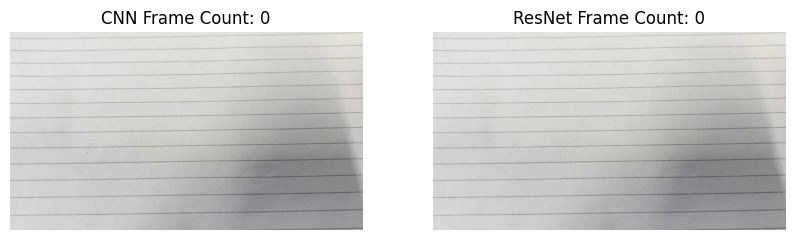

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━

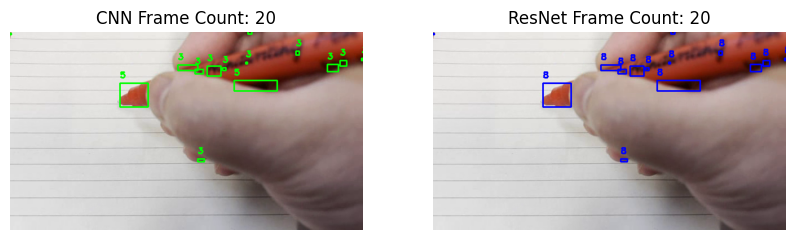

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━

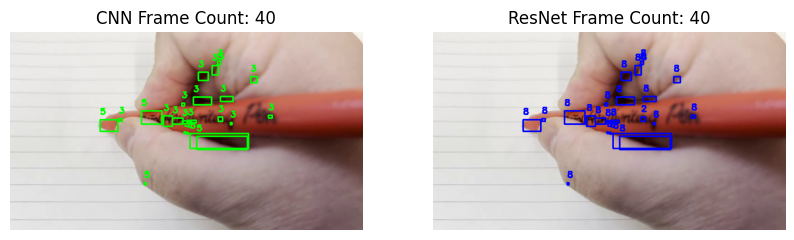

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━

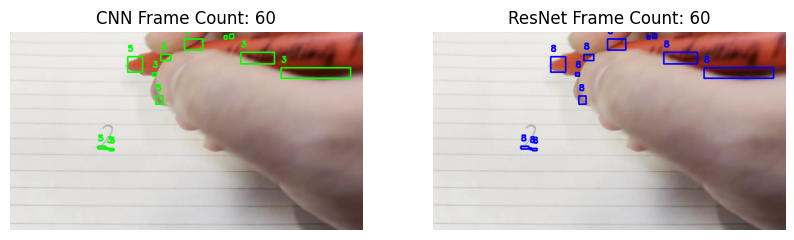

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━

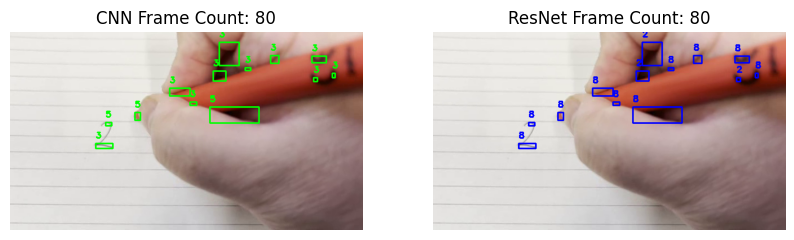

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━

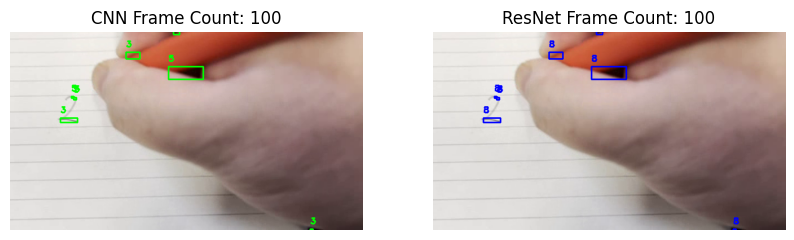

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━

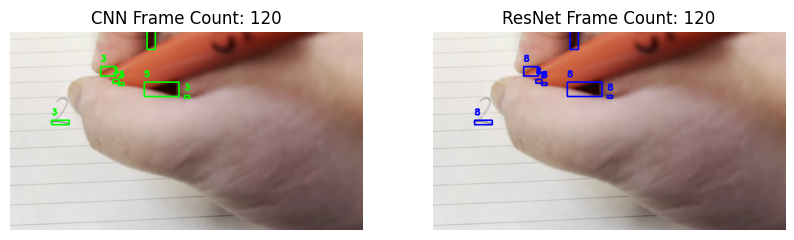

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━

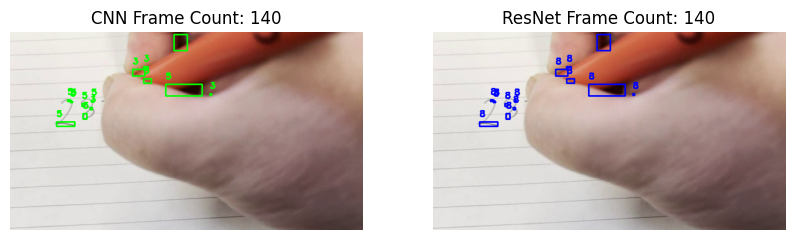

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━

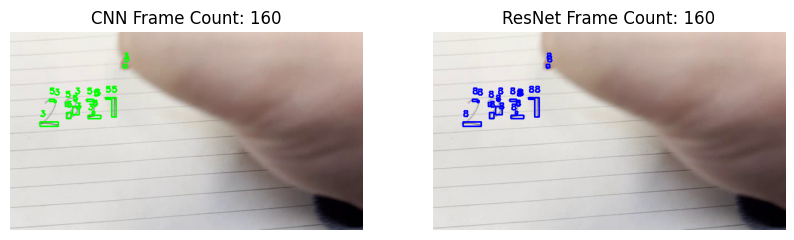

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━

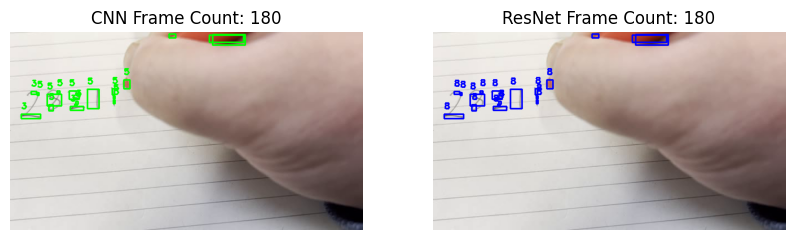

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━

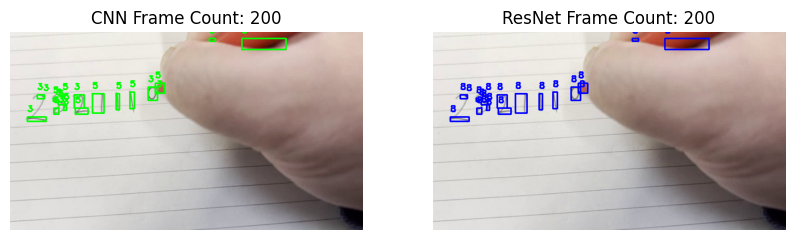

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━

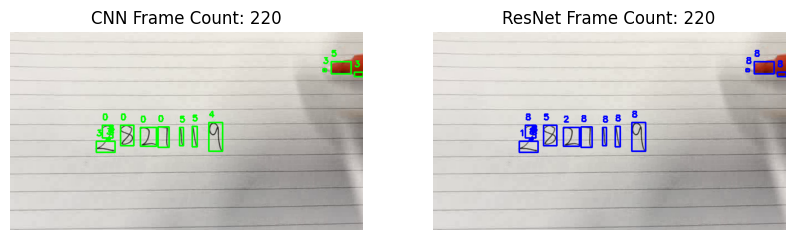

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━

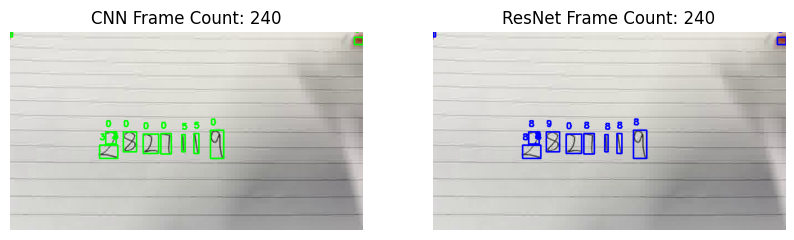

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━

In [ ]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

video_path = r"D:\SHU\ML_lab\Assesment\Number_Test_Data\015.avi"

def save_video(cnn_frames, frames_resnet, cnn_file="CNN_video.avi", resnet_file="ResNet_video.avi", fps=30):
    if not cnn_frames or not frames_resnet:
        raise ValueError("No frames to save.")

    cnn_frame_height, cnn_frame_width = cnn_frames[0].shape[:2]
    resnet_frame_height, resnet_frame_width = frames_resnet[0].shape[:2]

    if (cnn_frame_height, cnn_frame_width) != (resnet_frame_height, resnet_frame_width):
        raise ValueError("CNN and ResNet frames must have the same dimensions.")

    fourcc = cv2.VideoWriter_fourcc(*'XVID')

    cnn_out = cv2.VideoWriter(cnn_file, fourcc, fps, (cnn_frame_width, cnn_frame_height))
    resnet_out = cv2.VideoWriter(resnet_file, fourcc, fps, (resnet_frame_width, resnet_frame_height))

    for cnn_frame, resnet_frame in zip(cnn_frames, frames_resnet):
        if cnn_frame.shape[:2] != (cnn_frame_height, cnn_frame_width):
            raise ValueError("All CNN frames must have the same dimensions.")
        if resnet_frame.shape[:2] != (resnet_frame_height, resnet_frame_width):
            raise ValueError("All ResNet frames must have the same dimensions.")

        cnn_out.write(cnn_frame)
        resnet_out.write(resnet_frame)

    cnn_out.release()
    resnet_out.release()
    print(f"Videos saved successfully as {cnn_file} and {resnet_file}")
def process_video_with_pytesseract(video_path):

     # Load trained CNN model
    cnn_model = keras.models.load_model("mnist_cnn_model_improved.h5") 
     # Load trained ResNet model
    resnet_model = keras.models.load_model("resnet_like_model.keras") 
    if not video_path.endswith(".avi"):
        raise ValueError("Only .avi files are supported.")

    cap = cv2.VideoCapture(video_path)
    cnn_frames, frames_resnet = [], []
    frame_count = 0
    min_area = 0
    max_area = 100

    while True:
        ret, frame = cap.read()
        if not ret:
            break
        cnn_frame = frame.copy()
        resnet_frame = frame.copy()

        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        blur_frame = cv2.GaussianBlur(gray_frame, (5, 5), 0)
        binary_frame = cv2.adaptiveThreshold(
            blur_frame, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
            cv2.THRESH_BINARY_INV, 99, 45
        )

        edges = cv2.Canny(binary_frame, 100, 200)
        kernel = np.ones((2, 2), np.uint8)
        eroded = cv2.erode(cv2.dilate(edges, kernel, iterations=1), kernel, iterations=1)
        contours, _ = cv2.findContours(eroded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        for cnt in contours:
            area = cv2.contourArea(cnt)
            if min_area != 0 and max_area != 0 and not (min_area <= area <= max_area):
                continue  # Skip contours that do not within the specified area range

            x, y, w, h = cv2.boundingRect(cnt)
            padding = 10
            # padded coordinates
            x_padded = max(x - padding, 0)
            y_padded = max(y - padding, 0) 
            w_padded = min(x + w + padding, eroded.shape[1]) - x_padded  
            h_padded = min(y + h + padding, eroded.shape[0]) - y_padded  
            
            # Extract the padded bounding box
            digit_padded = frame[y_padded:y_padded+h_padded, x_padded:x_padded+w_padded]

            # Use pytesseract to recognize the digit
            # config = '--psm 10 -c tessedit_char_whitelist=0123456789'
            # predicted_digit = pytesseract.image_to_string(digit_padded, config=config).strip()

            # digit = cv2.bitwise_not(digit_padded)
            digit_gray = cv2.cvtColor(digit_padded, cv2.COLOR_BGR2GRAY)
            resized_digit = cv2.resize(digit_gray, (28, 28))
            normalized_digit = resized_digit / 255.0
            reshaped_digit = normalized_digit.reshape(1, 28, 28, 1)  # Add channel dimension for grayscale
            
            # Classify the digit
            cnn_prediction = cnn_model.predict(reshaped_digit)
            cnn_predicted_digit = np.argmax(cnn_prediction)
            
            resnet_prediction = resnet_model(reshaped_digit)
            resnet_predicted_digit = np.argmax(resnet_prediction)

            # using different colors for CNN and ResNet predictions
            cv2.rectangle(cnn_frame, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Green for CNN
            cv2.putText(cnn_frame, f"{cnn_predicted_digit}", (x, y - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

            # Draw bounding boxes and labels for ResNet predictions
            cv2.rectangle(resnet_frame, (x, y), (x + w, y + h), (255, 0, 0), 2)  # Blue for ResNet
            cv2.putText(resnet_frame, f"{resnet_predicted_digit}", (x, y - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

        # CNN
        if frame_count % 20 == 0:
            plt.figure(figsize=(10, 7))
            plt.subplot(1, 2, 1)
            plt.imshow(cv2.cvtColor(cnn_frame, cv2.COLOR_BGR2RGB))
            plt.title(f"CNN Frame Count: {frame_count}")
            plt.axis("off")
        #resnet
            plt.subplot(1, 2, 2)
            plt.imshow(cv2.cvtColor(resnet_frame, cv2.COLOR_BGR2RGB))
            plt.title(f"ResNet Frame Count: {frame_count}")
            plt.axis("off")
            plt.show()

        cnn_frames.append(cnn_frame)
        frames_resnet.append(resnet_frame)
        frame_count += 1

    cap.release()
    cv2.destroyAllWindows()
    save_video(cnn_frames, frames_resnet)

process_video_with_pytesseract(video_path);
